<a href="https://colab.research.google.com/github/brkent/raspberrypi/blob/main/polarplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Brightest stars centered around the Celestial pole**

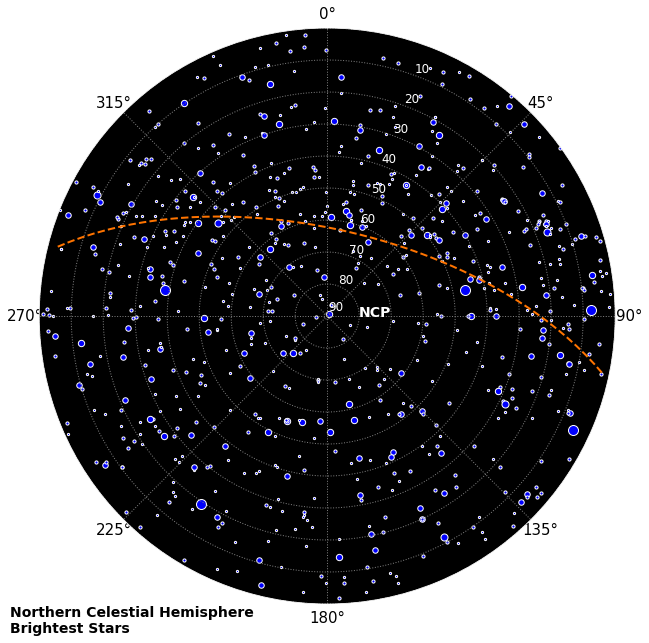

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, rc, grid
import csv

"""
Science and Computing with Raspberry Pi
Brian R. Kent
"""

# get data
filename = 'bright.dat'
fields = ['_RAJ2000','_DEJ2000','HR','Name','HD','ADS','VarID','RAJ2000','DEJ2000','Vmag','B-V','SpType','NoteFlag']
reader = csv.DictReader(open(filename), fields, delimiter='|')
dicts = []

# Skip first header line
next(reader)
ra = []
dec = []
vmag = []
# Add in vertex elements with XY coordinates at each row
for row in reader:
    try:
        if ((float(row['_DEJ2000']) > 0.00) and (float(row['Vmag']) <= 5.0)):
            ra.append(float(row['_RAJ2000']))
            dec.append(float(row['_DEJ2000']))
            vmag.append(float(row['Vmag']))
    except:
        pass

# Grid radar green, dotted lines
rc('grid', color='#006363', linewidth=1, linestyle=':')
rc('xtick', labelsize=15, color='black')
rc('ytick', labelsize=15, color='black')
rc('axes',edgecolor='white')

# make a square figure
size = 10
fig = figure(figsize=(size, size), facecolor='white')
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True, facecolor='black')

magscale = {'5':5,'4':10,'3':30,'2':40,'1':50,'0':100,'-1':100}

for i in range(len(ra)):
    ax.scatter(np.array(ra[i])*np.pi/180.0, 90.0-np.array(dec[i]),
               s=magscale[str(int(round(vmag[i])))], 
               color='blue', edgecolor='white')

# Galactic Plane
import astropy.units as u
from astropy.coordinates import SkyCoord

gl = list(np.linspace(0,360,100))
gb = list(np.zeros(100))
gc = SkyCoord(l=gl*u.degree, b=gb*u.degree, frame='galactic')

raline=gc.fk5.ra.value
decline=gc.fk5.dec.value
raplot=[]
decplot=[]
for i in range(len(raline)):
    if decline[i] > 0.0:
        raplot.append(raline[i])
        decplot.append(decline[i])

ax.plot(np.array(raplot)*np.pi/180.0, 
        90.0-np.array(decplot), 
        lw=2,linestyle='--', color='#ff7400')

ax.set_rmax(90.0)
grid(True, color='grey')

ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
ax.set_rgrids([1, 10, 20, 30, 40, 50, 60, 70, 80, 90],
              ['90','80','70','60','50','40','30','20','10','0 Degree Decl.'],
              20, fontsize=12, color='white' )
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.text(np.pi/2,10,'NCP',fontsize=14,fontweight='bold', color='white')
ax.text(225.0*np.pi/180.0,140,
        'Northern Celestial Hemisphere \nBrightest Stars',
        fontsize=14,fontweight='bold', color='black')

# plt.savefig('polarstars.png')

plt.show()

